# Cat or dog? A CNN example using Keras
This example follows the [keras blog for this problem](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) and uses the [Kaggle dogs v cats data set](https://www.kaggle.com/c/dogs-vs-cats).

In [1]:
# Install a package we don't have in this container.
!conda install -y pillow

Fetching package metadata .......
Solving package specifications: ..........

Package plan for installation in environment /root/miniconda2:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jbig-2.1                   |                0          29 KB
    xz-5.2.2                   |                0         644 KB
    libtiff-4.0.6              |                2         1.5 MB
    pillow-3.4.2               |           py27_0         852 KB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

    jbig:    2.1-0       
    libtiff: 4.0.6-2     
    pillow:  3.4.2-py27_0
    xz:      5.2.2-0     

Fetching packages ...
jbig-2.1-0.tar 100% |################################| Time: 0:00:00   1.47 MB/s
xz-5.2.2-0.tar 100% |################################| Time: 0:00:00

In [3]:
import os 
import glob
import numpy as np
from scipy import ndimage, misc
import  math
from random import shuffle

In [5]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

# dimensions of our images.
img_width, img_height = 150, 150

# location of training and validataion data
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

# Define out model as a series of layers
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Define how the metric we want to minimise on training (loss)
# and the method we are going to use to do this (optimiser).
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


# Set up our feed for training. By deforming the images slightly (zoom, rotate, etc) 
# we effectivly get more images to train on.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

# Set up our feed for training / validating.
test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Using TensorFlow backend.


Found 21998 images belonging to 2 classes.
Found 3002 images belonging to 2 classes.


In [2]:
# This is where we actually start training.
model.fit_generator(
        train_generator,
        samples_per_epoch=2016,
        nb_epoch=50,
        validation_data=validation_generator,
        nb_val_samples=800)

model.save('trained.v2.h5')
with open('trained.v2.json', 'w') as f:
    f.write(model.to_json())

Using TensorFlow backend.


Found 21998 images belonging to 2 classes.
Found 3002 images belonging to 2 classes.
Epoch 1/50
1984/2000 [============================>.] - ETA: 0s - loss: 0.6900 - acc: 0.5252

/root/miniconda2/lib/python2.7/site-packages/keras/engine/training.py:1470: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


2016/2000 [==============================] - 95s - loss: 0.6897 - acc: 0.5253 - val_loss: 0.6814 - val_acc: 0.5550
Epoch 2/50
2016/2000 [==============================] - 84s - loss: 0.6836 - acc: 0.5784 - val_loss: 0.6988 - val_acc: 0.5450
Epoch 3/50
2016/2000 [==============================] - 94s - loss: 0.6750 - acc: 0.5789 - val_loss: 0.6664 - val_acc: 0.5825
Epoch 4/50
2016/2000 [==============================] - 97s - loss: 0.6616 - acc: 0.5903 - val_loss: 0.6391 - val_acc: 0.6053
Epoch 5/50
2016/2000 [==============================] - 98s - loss: 0.6411 - acc: 0.6235 - val_loss: 0.6154 - val_acc: 0.6450
Epoch 6/50
2016/2000 [==============================] - 94s - loss: 0.6357 - acc: 0.6324 - val_loss: 0.6354 - val_acc: 0.6262
Epoch 7/50
2016/2000 [==============================] - 94s - loss: 0.6270 - acc: 0.6498 - val_loss: 0.5690 - val_acc: 0.6950
Epoch 8/50
2016/2000 [==============================] - 104s - loss: 0.6027 - acc: 0.6721 - val_loss: 0.5748 - val_acc: 0.7070
Ep

In [8]:
# If needs be we can pull in an already trained model.
# from keras.models import load_model
# model = load_model('trained.h5')

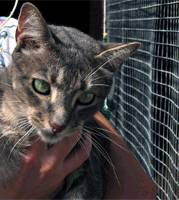

The above is a dog


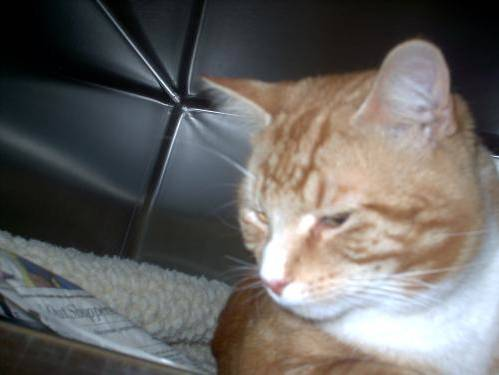

The above is a cat


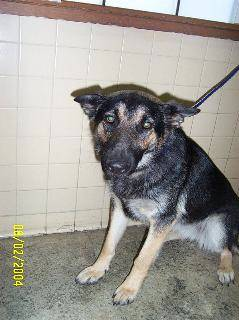

The above is a dog


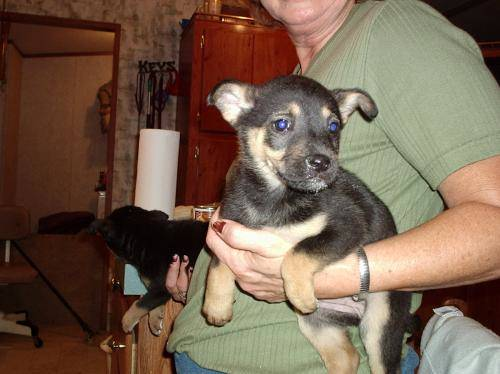

The above is a cat


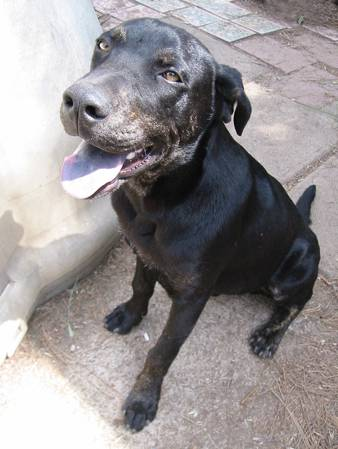

The above is a dog


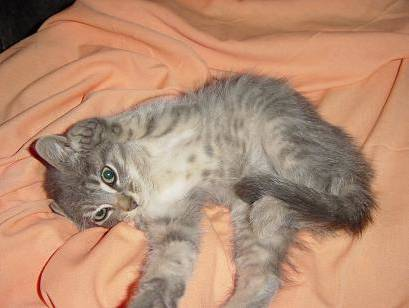

The above is a cat


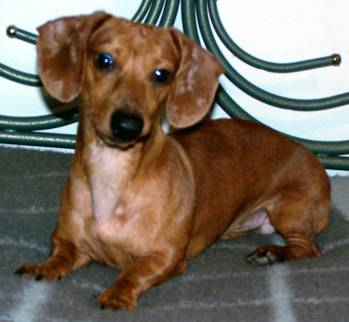

The above is a dog


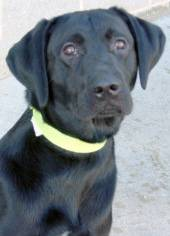

The above is a dog


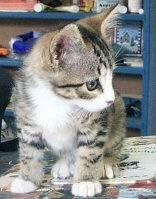

The above is a cat


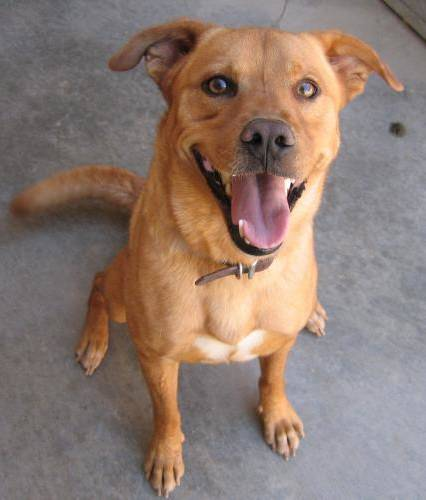

The above is a dog
I got 8 out of 10 correct


In [28]:
from IPython.display import Image, display


# Let's test on 
DOG = train_generator.class_indices['dog']
CAT = train_generator.class_indices['cat']
take = 10
correct = 0
for i in range(take):
    i = np.random.randint(0,1001)
    animal = 'dog' if i % 2 == 0 else 'cat'
    image = 'data/validation/%s/%s.%i.jpg' % (animal, animal, i)
    X = ndimage.imread(image)
    X = misc.imresize(X, (img_width, img_height))
    X = X / 256.0
    X = np.array([X])
    guessed = 'cat' if round(model.predict(X)[0][0]) == CAT else 'dog'
    correct += 1 if guessed == animal else 0
    display((Image(image, width=75)))
    print 'The above is a %s' % guessed
    
print 'I got %s out of %s correct' % (correct, take)

In [36]:
import encoder
e = encoder.Encoder('trained.h5')
e.serialize()
e.save()

# What now? Some ideas.
* Can you handel more types of images: http://www.cs.utoronto.ca/~kriz/cifar.html
* What about hand writting - https://www.tensorflow.org/tutorials/mnist/beginners/
* Face recognition? http://cswww.essex.ac.uk/mv/allfaces/index.html
* Take your model and turn it into a web app? See https://github.com/tam203/web_cat_dog. 
![title](app.png)